<a href="https://colab.research.google.com/github/jackericson98/20234-Machine-Learning-AssignmentTwo/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC 4850 / 6850 / DSCI 4850 - Assisgment 2 - (350/400 points)

**Total points (350 undergraduate / 400 graduate)**

**Student Name: (write your name here)**

**Graduate / Undergraduate (select one)**

## Instructions:

You are to make a copy of this notebook on your own Google Drive (if you don't have one, get one, it is free), and use the exact format provided. Any code needs to go in the code cells, and any 'text' answer/description needs to go in the proper text cell. We will not be looking for answers randomly placed so please read the instructions.

You are to use only the libraries provided in the next code cell. Any additional library is NOT allowed and will cause you to lose all the points that use said library's functions/functionality. You can use any functions given in the class code examples, but be very very careful of lifting anything 
'as-is' from the internet as it will be considerered plagiarism. 

**IMPORTANT: Make sure you use 1234 for your randomseed/random state. Failure to do so will make your answers not comparable to the answer key and you will get a zero on the whole assignment.**

## Submission format:

The submission for Assignment two will have two components:

1) You are to create a PDF from the PRINT out of this notebook with all cells executed sequentially. It is the student's responsibility to be able to do this and no excuses will be accepted, no legible PDF = zero grade. So practice and test before submission time. This PDF should be named LastName_FirstName-Assignment2.PDF

2) The student should create a GitHub repository for this assignment and properly title the repository Class_CODE-ClassName-AssignmentTwo. This repository should have a readme file and the Google Colab notebook in it. Note that colab can save a copy directly to GitHub so make sure you test this. Downloading the notebook file and uploading it directly will result in 200 points deduction. The link to your GitHub repository should be included as text/message in the iCollege submission drop, failure to include this link will result in a 100 point penalty. 

## Extra Credit for all:

Any student can get 50 extra credit points by doing two simple things (you need to do BOTH):

1) Make nice and pretty plots (only using the provided packages!)

2) Make your GitHub repo professional (this includes your own landing page as well). Examples: https://github.com/abhisheknaiidu/awesome-github-profile-readme


Remember that you will need a portfolio for your job search, and a professional looking repo will certainly impress recruiters/interviewers. So this is more of a favor to yourself! (yes, I follow this myself: https://github.com/jmbanda)


In [1]:
############## These are the only imports allowed to solve this homework, so make sure you do not add anything else down below

%matplotlib inline

import numpy as np
import pandas as pd
import sklearn 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


## Renaming imported functions

In [2]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import Perceptron as ptron, LogisticRegression as l_r
from sklearn.metrics import accuracy_score as a_s, classification_report as c_r, confusion_matrix as c_m
from sklearn.tree import DecisionTreeClassifier as dtc

Using the Wine dataset from sklearn:

In [3]:
#get the wine dataset from sklearn and take a look at the description provided
from sklearn import datasets
wine = datasets.load_wine()

# Question 1 (10 points)

What can you say about the dataset (use code to descirbe it)? any particular things of interest? Find at least two things that you find interesting.

In [4]:
print("\n\nGeneral Description of the data provided by the set:\n\n", wine['DESCR'])
print("="*100)
print("\n\nThe data (178 rows x 13 columns)\n\n", wine['data'])
print("\n" + "="*100)
print("\n\nThe classification of the data (our goal)\n\n", wine['target'])
print("\n\n")



General Description of the data provided by the set:

 .. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.3

#### Answer:
This data set describes the 13 different numerical chemical attributes of 178 different wines grown in the same region of Italy in 1988. Three different cultivators were involved in the production of the wines, each with their own unique methods (presumably). 

# Question 2 (10 points)

Remove class_2, so it becomes a binary problem now. Split the dataset into a testing and a training set using 65% of the data for training and the rest for testing. Use the built-in sklearn functionality for this, any other way will not be graded.

In [5]:
# Get the data and the targets 
my_data = [wine['data'][i] for i in range(len(wine['data'])) if wine['target'][i] != 2]
my_target = [_ for _ in wine['target'] if _ != 2]
# Split the data using sklearn
x_trn, x_tst, y_trn, y_tst = tts(my_data, my_target, test_size=.35)

# Question 3 (30 points)

Use the perceptron algorithm (with default settings and the correct seed) to build a model on the training set and report the model's accuracy.

In [6]:
# Create the perceptron with the random state '1234'
my_ptron = ptron(random_state=1234)
# Fit the data using the built in .fit() method
my_ptron.fit(x_trn, y_trn)
# Create the test and train predictions from the newly fitted model
trn_preds = my_ptron.predict(x_trn)
tst_preds = my_ptron.predict(x_tst)
# Test the predictions against the real classifiers using sklearns accurracy score function
trn_acc = a_s(trn_preds, y_trn)
tst_acc = a_s(tst_preds, y_tst)
# Present the results
print("\nPerceptron Results:\n\n  Train data accuracy: {:.2f} %\n  Test data accuracy:  {:.2f} %".format(trn_acc, tst_acc))


Perceptron Results:

  Train data accuracy: 0.77 %
  Test data accuracy:  0.74 %


# Question 4 (20 points)

Show the classification report for the built model. In the text cell, following the code block for question 4, descibe what findings can be infered from the classification report. Mention at least 3 observations.

In [7]:
# Print out the classification report for the perceptron model
print(c_r(y_tst, tst_preds, target_names=["Class 0", "Class 1"]))
# Save a dictionary of values for the model
p_c_r = c_r(y_tst, tst_preds, target_names=["Class 0", "Class 1"], output_dict=True)

              precision    recall  f1-score   support

     Class 0       1.00      0.48      0.65        23
     Class 1       0.66      1.00      0.79        23

    accuracy                           0.74        46
   macro avg       0.83      0.74      0.72        46
weighted avg       0.83      0.74      0.72        46



#### Answer:
The classification report provides us with the precision, recall and f1 score of each of the classes as well as their averages. Class 1 has a higher recall than class 0, but class 0 has a higher precision. From this we can infer that class 1 had fewer false negatives, while class 0 had fewer false positives. 

# Question 5 (30 points)

Use the trained model to make predictions on the test set. Output AND plot the confusion matrix from the model's predictions. 

In the second code cell, plot side by side: On the left side, the test set and its labels (using features Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending its class label. On the right side, the actual predictions (use the same Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending on its class label.

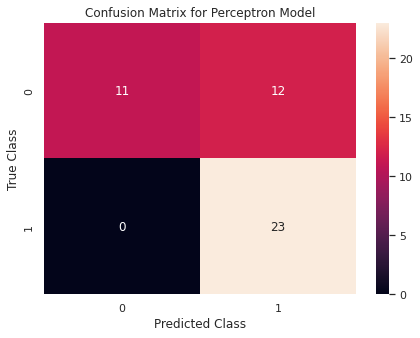

In [8]:
# Create the confusion matrix for the perceptron model
cnf_mtx = c_m(y_tst, tst_preds)
plt.figure(figsize=(7,5))
plt.title("Confusion Matrix for Perceptron Model")
sns.heatmap(cnf_mtx, annot=True)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

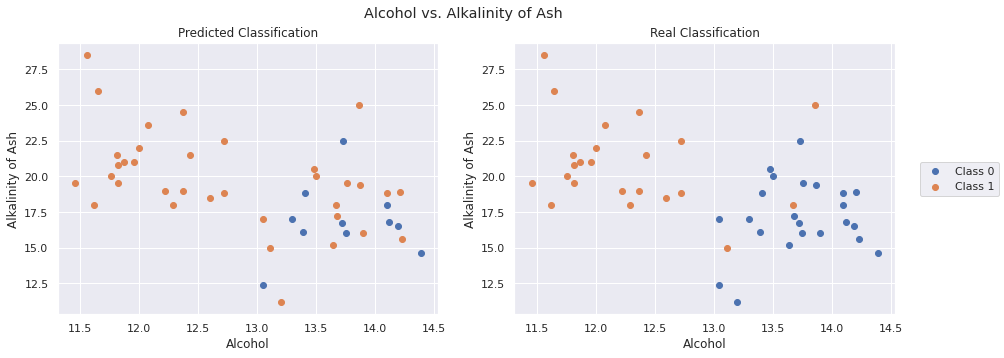

In [9]:
# Create space for the plot
print("\n\n")

# Get the Alcohol and Alcininity of Ash values and seperate them
p_alc_tst = [[x_tst[j][0] for j in range(len(x_tst)) if tst_preds[j] == i] for i in range(2)]
p_aoa_tst = [[x_tst[j][3] for j in range(len(x_tst)) if tst_preds[j] == i] for i in range(2)]

y_alc_tst = [[x_tst[j][0] for j in range(len(x_tst)) if y_tst[j] == i] for i in range(2)]
y_aoa_tst = [[x_tst[j][3] for j in range(len(x_tst)) if y_tst[j] == i] for i in range(2)]

# Create the figure
fig = plt.figure(figsize=(15, 5))

# Create the subplots
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

# Set the main title
fig.suptitle("Alcohol vs. Alkalinity of Ash")

# Plot the data and set the legend, axis labels, and title for the predicted classes
for i in range(2):
    ax0.scatter(p_alc_tst[i], p_aoa_tst[i])
    ax1.scatter(y_alc_tst[i], y_aoa_tst[i])
    
# Set the legend
fig.legend(labels=["Class 0", "Class 1" ], loc='center right')

# Set the legend, axis labels, and title 
ax0.set_xlabel("Alcohol")
ax0.set_ylabel("Alkalinity of Ash")
ax0.set_title("Predicted Classification")
ax1.set_xlabel("Alcohol")
ax1.set_ylabel("Alkalinity of Ash")
ax1.set_title("Real Classification")

# Show the plot and create space
plt.show()
print("\n\n")

# Question 6 (10 points) 

a) Do the plot right plot on Question 5 - part 2 match the confusion matrix of part 1?

b) Any interesting observations from the predictions and the model performance? (write at least 2)

#### Answer:
Yes the number of points classified as classes 1 and 2 correspond to the values in the confusion matrix

#### Answer:
Interestingly, in this comparison of variables it is possible to see the line where the points are classified. While this line doesn't perfectly classify the points it gets pretty close. On the other hand it is also interesting that the predicted classification incorrectly classified a point as being class 1 deep into class 0 'territory'.

# Question 7 (10 points)

Reload the Wine dataset and split the dataset into a testing and a training set using 65% of the data for training and the rest for testing. Use the built-in sklearn functionality for this, any other way will not be graded.

In [10]:
# Load the data set again
wine = datasets.load_wine()

# Split the data using sklearn
x_trn, x_tst, y_trn, y_tst = tts(wine['data'], wine['target'], test_size=.35)

# Question 8 (30 points)

Use the Decision Tree algorithm (with default settings and the correct seed) to build a model on the training set and report the model's accuracy.

In [11]:
# Create the tree and fit it to the train data
my_tree = dtc(random_state=1234)
my_tree.fit(x_trn, y_trn)
# Create the test and train predictions from the newly fitted model
trn_preds = my_tree.predict(x_trn)
tst_preds = my_tree.predict(x_tst)
# Test the predictions against the real classifiers using sklearns accurracy score function
trn_acc = a_s(trn_preds, y_trn)
tst_acc = a_s(tst_preds, y_tst)
# Present the results
print("\Decision Tree Results:\n\n  Train data accuracy: {:.2f} %\n  Test data accuracy:  {:.2f} %".format(trn_acc, tst_acc))

\Decision Tree Results:

  Train data accuracy: 1.00 %
  Test data accuracy:  0.94 %


# Question 9 (20 points)

Show the classification report for the built model. In the text cell, following the code block for question 9, descibe what findings can be infered from the classification report. Mention at least 3 observations.

In [12]:
# Print out the classification report for the perceptron model
print(c_r(y_tst, tst_preds, target_names=["Class 0", "Class 1", "Class 2"]))
# Save a dictionary of values for the model
dt_c_r = c_r(y_tst, tst_preds, target_names=["Class 0", "Class 1", "Class 2"], output_dict=True)

              precision    recall  f1-score   support

     Class 0       0.95      0.86      0.90        21
     Class 1       0.89      0.96      0.93        26
     Class 2       1.00      1.00      1.00        16

    accuracy                           0.94        63
   macro avg       0.95      0.94      0.94        63
weighted avg       0.94      0.94      0.94        63



#### Answer:
This seems to be more accurate than the perceptron, but not by much. Class 2 was predicted exactly correct. All of the error lies with class 1 and class 0. 

# Question 10 (30 points)

Use the trained model to make predictions on the test set. Output AND plot the confusion matrix from the model's predictions. 

In the second code cell, plot side by side: On the left side, the test set and its labels (using features Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending its class label. On the right side, the actual predictions (use the same Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending on its class label.

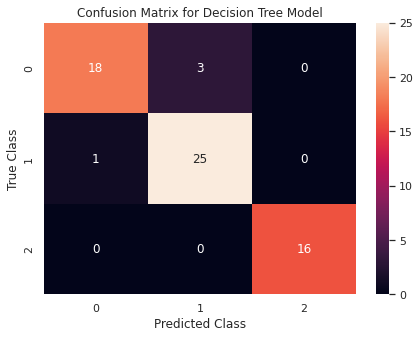

In [13]:
# Create the confusion matrix for the perceptron model
cnf_mtx = c_m(y_tst, tst_preds)
plt.figure(figsize=(7,5))
plt.title("Confusion Matrix for Decision Tree Model")
sns.heatmap(cnf_mtx, annot=True)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

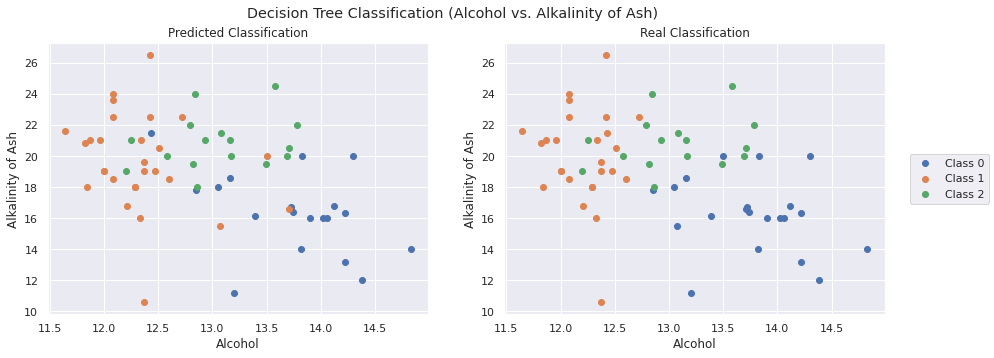

In [14]:
# Create space for the plot
print("\n\n")

# Get the Alcohol and Alcininity of Ash values and seperate them
p_alc_tst = [[x_tst[j][0] for j in range(len(x_tst)) if tst_preds[j] == i] for i in range(3)]
p_aoa_tst = [[x_tst[j][3] for j in range(len(x_tst)) if tst_preds[j] == i] for i in range(3)]

y_alc_tst = [[x_tst[j][0] for j in range(len(x_tst)) if y_tst[j] == i] for i in range(3)]
y_aoa_tst = [[x_tst[j][3] for j in range(len(x_tst)) if y_tst[j] == i] for i in range(3)]

# Create the figure
fig = plt.figure(figsize=(15, 5))

# Create the subplots
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

# Set the main title
fig.suptitle("Decision Tree Classification (Alcohol vs. Alkalinity of Ash)")

# Plot the data
for i in range(3):
    ax0.scatter(p_alc_tst[i], p_aoa_tst[i])
    ax1.scatter(y_alc_tst[i], y_aoa_tst[i])

# Set the legend
fig.legend(labels=["Class 0", "Class 1", "Class 2"], loc='center right')

# Set the legend, axis labels, and title 
ax0.set_xlabel("Alcohol")
ax0.set_ylabel("Alkalinity of Ash")
ax0.set_title("Predicted Classification")
ax1.set_xlabel("Alcohol")
ax1.set_ylabel("Alkalinity of Ash")
ax1.set_title("Real Classification")

# Show the plot and create space
plt.show()
print("\n\n")

# Question 11 (30 points) 

a) Do the plot right plot on Question 10 - part 2 match the confusion matrix of part 1?

b) Any interesting observations from the predictions and the model performance? (write at least 2)

c) Plot the figure from question 10 - part 2 using the `visualize_classifier` function given during the class example from 2/20/2023.

#### Answer:
Yes, the two plots are nearly identical, which the confusion matrix predicted. 

#### Answer:
The plots are only slightly different, but you can tell where points are swapped. Many of class 1's points are further outside of the obvious grouping than they should be. This implies that the other parameters are influencing the model.

In [15]:

def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X=X, y=y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    
# visualize_classifier(model=dtc(), X=x_trn, y=y_trn)

# Question 12 (10 points)

Reload the Wine dataset and split the dataset into a testing and a training set using 65% of the data for training and the rest for testing. Use the built-in sklearn functionality for this, any other way will not be graded.

In [16]:
# Load the data set again
wine = datasets.load_wine()

# Split the data using sklearn
x_trn, x_tst, y_trn, y_tst = tts(wine['data'], wine['target'], test_size=.35)

# Question 13 (30 points)

Use the Logistic Regression (with as this is a multi-class problem, use the **One Vs Rest algorithm** we must use `liblinear` solver and the correct seed) to build a model on the training set and report the model's accuracy.

In [17]:
# Create the tree and fit it to the train data
my_lr = l_r(random_state=1234, multi_class='ovr', solver='liblinear')
my_lr.fit(x_trn, y_trn)
# Create the test and train predictions from the newly fitted model
trn_preds = my_tree.predict(x_trn)
tst_preds = my_tree.predict(x_tst)
# Test the predictions against the real classifiers using sklearns accurracy score function
trn_acc = a_s(trn_preds, y_trn)
tst_acc = a_s(tst_preds, y_tst)
# Present the results
print("Logistic Regression Results:\n\n  Train data accuracy: {:.2f} %\n  Test data accuracy:  {:.2f} %".format(trn_acc, tst_acc))

Logistic Regression Results:

  Train data accuracy: 0.97 %
  Test data accuracy:  0.98 %


# Question 14 (20 points)

Show the classification report for the built model. In the text cell, following the code block for question 14, descibe what findings can be infered from the classification report. Mention at least 3 observations.

In [18]:
# Print out the classification report for the perceptron model
print(c_r(y_tst, tst_preds, target_names=["Class 0", "Class 1", "Class 2"]))
# Save a dictionary of values for the model
lr_c_r = c_r(y_tst, tst_preds, target_names=["Class 0", "Class 1", "Class 2"], output_dict=True)

              precision    recall  f1-score   support

     Class 0       0.95      1.00      0.98        21
     Class 1       1.00      0.96      0.98        26
     Class 2       1.00      1.00      1.00        16

    accuracy                           0.98        63
   macro avg       0.98      0.99      0.99        63
weighted avg       0.98      0.98      0.98        63



#### Answer:
This model seems to be more accurate than either the perceptron or the decision tree. Class 2 has perfect precision and class 1 and class 0 have high recall. The accuracy of this model is much higher than the other two as well. 

# Question 15 (30 points)

Use the trained model to make predictions on the test set. Output AND plot the confusion matrix from the model's predictions. 

In the second code cell, plot side by side: On the left side, the test set and its labels (using features Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending its class label. On the right side, the actual predictions (use the same Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending on its class label.

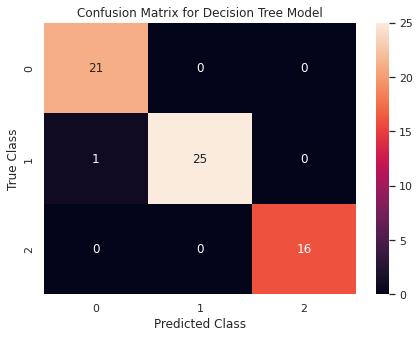

In [19]:
# Create the confusion matrix for the perceptron model
cnf_mtx = c_m(y_tst, tst_preds)
plt.figure(figsize=(7,5))
plt.title("Confusion Matrix for Decision Tree Model")
sns.heatmap(cnf_mtx, annot=True)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

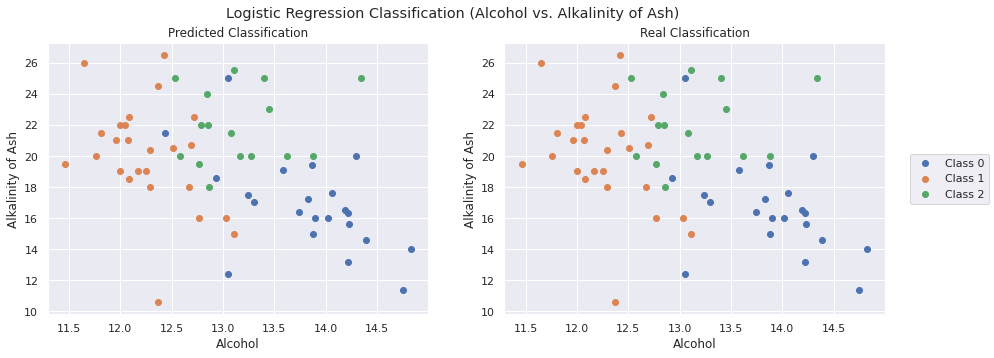

In [20]:
# Create space for the plot
print("\n\n")

# Get the Alcohol and Alkalinity of Ash values and seperate them
p_alc_tst = [[x_tst[j][0] for j in range(len(x_tst)) if tst_preds[j] == i] for i in range(3)]
p_aoa_tst = [[x_tst[j][3] for j in range(len(x_tst)) if tst_preds[j] == i] for i in range(3)]

y_alc_tst = [[x_tst[j][0] for j in range(len(x_tst)) if y_tst[j] == i] for i in range(3)]
y_aoa_tst = [[x_tst[j][3] for j in range(len(x_tst)) if y_tst[j] == i] for i in range(3)]

# Create the figure
fig = plt.figure(figsize=(15, 5))

# Create the subplots
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

# Set the main title
fig.suptitle("Logistic Regression Classification (Alcohol vs. Alkalinity of Ash)")

# Plot the data
for i in range(3):
    ax0.scatter(p_alc_tst[i], p_aoa_tst[i])
    ax1.scatter(y_alc_tst[i], y_aoa_tst[i])

# Set the legend
fig.legend(labels=["Class 0", "Class 1", "Class 2"], loc='center right')

# Set the legend, axis labels, and title 
ax0.set_xlabel("Alcohol")
ax0.set_ylabel("Alkalinity of Ash")
ax0.set_title("Predicted Classification")
ax1.set_xlabel("Alcohol")
ax1.set_ylabel("Alkalinity of Ash")
ax1.set_title("Real Classification")

# Show the plot and create space
plt.show()
print("\n\n")

# Question 16 (20 points) 

a) Do the plot right plot on Question 15 - part 2 match the confusion matrix of part 1?

b) Any interesting observations from the predictions and the model performance? (write at least 2)

#### Answer:
Yes this plot makes sense when compared to the confusion matrix.

#### Answer: 
The plots are very similar and has only 1 point out of place. When compared to the prediction plot for the decision tree model the logistic lograssion plot is much closer to the real results. 

# Question 17 (10 points)

Create AND display dataframe containing in each row the accruacy, precision, recall for each of the models built. 

In the textual answer cell, discuss which one is the best performing model and why?

In [21]:
# Get the values from the dictionaries saved from eariler
my_vals = [[p_c_r['accuracy'], p_c_r['weighted avg']['precision'], p_c_r['weighted avg']['recall']], 
           [dt_c_r['accuracy'], dt_c_r['weighted avg']['precision'], dt_c_r['weighted avg']['recall']], 
           [lr_c_r['accuracy'], lr_c_r['weighted avg']['precision'], lr_c_r['weighted avg']['recall']]]
# Create the data frame
my_df = pd.DataFrame(my_vals, index=["Perceptron", "Decision Tree", "Logistic Regression"], columns=["Accuracy", "Precision", "Recall"])
my_df.head()

,Accuracy,Precision,Recall
Perceptron,0.739130,0.828571,0.739130
Decision Tree,0.936508,0.938238,0.936508
Logistic Regression,0.984127,0.984848,0.984127


The logistic regression classifier seems to be the best classifier for the data because it scores higher in accuracy, precision and recall than the decision tree classifier and the perceptron

# Graduate Student Question: (50 points)

Modify the `visualize_classifier` function provided during the 2/20/2023 class to be able to work in 3 dimensions (currently only works in two dimensions). Take the Decision Tree classifier model from Question 8 and plot the separation of the classes using the following axes: (Alcohol as the X axis and Alcalinity of Ash as the Y axis, and Ash as the Z axis).


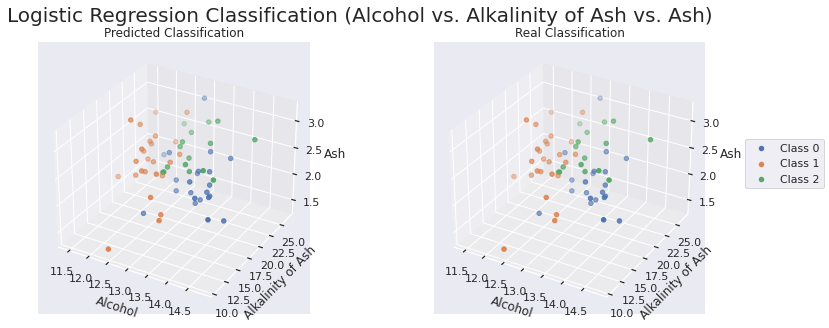

In [23]:
# In jupyter notebook you can use %matplotlib notebook and interact with the plots
# but colab doesn't seem to have that option.




# Create space for the plot
print("\n\n")

# Get the Alcohol and Alkalinity of Ash values and seperate them
p_alc_tst = [[x_tst[j][0] for j in range(len(x_tst)) if tst_preds[j] == i] for i in range(3)]
p_aoa_tst = [[x_tst[j][3] for j in range(len(x_tst)) if tst_preds[j] == i] for i in range(3)]
p_ash_tst = [[x_tst[j][2] for j in range(len(x_tst)) if tst_preds[j] == i] for i in range(3)]

y_alc_tst = [[x_tst[j][0] for j in range(len(x_tst)) if y_tst[j] == i] for i in range(3)]
y_aoa_tst = [[x_tst[j][3] for j in range(len(x_tst)) if y_tst[j] == i] for i in range(3)]
y_ash_tst = [[x_tst[j][2] for j in range(len(x_tst)) if y_tst[j] == i] for i in range(3)]

# Create the figure
fig = plt.figure(figsize=(13,5))

# Create the subplots
ax0 = fig.add_subplot(121, projection='3d')
ax1 = fig.add_subplot(122, projection='3d')

# Set the main title
fig.suptitle("Logistic Regression Classification (Alcohol vs. Alkalinity of Ash vs. Ash)", fontsize=20)

# Plot the data
for i in range(3):
    ax0.scatter3D(p_alc_tst[i], p_aoa_tst[i], p_ash_tst[i])
    ax1.scatter3D(y_alc_tst[i], y_aoa_tst[i], y_ash_tst[i])

# Set the legend
fig.legend(labels=["Class 0", "Class 1", "Class 2"], loc='center right')

# Set the legend, axis labels, and title 
ax0.set_xlabel("Alcohol")
ax0.set_ylabel("Alkalinity of Ash")
ax0.set_zlabel("Ash")
ax0.set_title("Predicted Classification")
ax1.set_xlabel("Alcohol")
ax1.set_ylabel("Alkalinity of Ash")
ax1.set_zlabel("Ash")
ax1.set_title("Real Classification")

# Show the plot and create space
plt.show()
print("\n\n")